In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm
import seaborn as sns

In [2]:
df = pd.read_csv("kaggle_dataset/ingredients_modified.csv")
df

,Title,Instructions,Cleaned_Ingredients,cleaned
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...","['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","chicken,kosher salt,squash total,sage,butter,r..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,"['2 large egg whites', '1 pound new potatoes (...","egg,pound inch diameter,salt,pepper,thyme,parsley"
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,"['1 cup evaporated milk', '1 cup whole milk', ...","milk,milk,powder,onion powder,paprika,ground p..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,"['1 (¾- to 1-pound) round Italian loaf, cut in...","round loaf,oil,sausage,stick butter,cut,choppe..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","dark brown sugar,water,bourbon,lemon juice,app..."
...,...,...,...,...
13491,Brownie Pudding Cake,Preheat the oven to 350°F. Into a bowl sift to...,"['1 cup all-purpose flour', '2/3 cup unsweeten...","flour,cocoa powder,baking powder,salt,sugar,st..."
13492,Israeli Couscous with Roasted Butternut Squash...,Preheat oven to 475°F.\nHalve lemons and scoop...,"['1 preserved lemon', '1 1/2 pound butternut s...","lemon,pound butternut squash,dice,oil,onion,ch..."
13493,Rice with Soy-Glazed Bonito Flakes and Sesame ...,"If using katsuo bushi flakes from package, moi...",['Leftover katsuo bushi (dried bonito flakes) ...,katsuo bushi bonito dashi katsuo bushi fresh p...
13494,Spanakopita,Melt 1 tablespoon butter in a 12-inch heavy sk...,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,"stick tablespoon butter,baby spinach,feta,phyllo"


In [3]:
# see how many have similar last two words
df = [i.split(',') for i in df.cleaned]

In [4]:
# distinct ingredients

def get_distinct_ingredients(d):
    return len(set([j for i in d for j in i]))

get_distinct_ingredients(df)

13533

In [5]:
ings = list(set([j for i in df for j in i]))

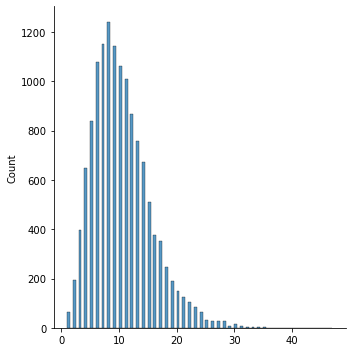

In [6]:
# distribution of length of ingredients
sns.displot([len(i) for i in df])

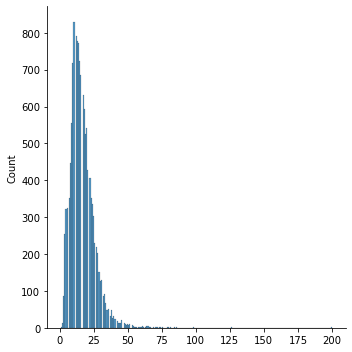

In [7]:
# distribution of tokens in ingredients
sns.displot([len(i) for i in ings])

In [8]:
def get_last_n(ing, n=2):
    split = ing.split(' ')
    
    assert n == 2
    if len(split) < n: 
        return False
    return split[-1], split[-2]

reducable_ings = []
for i in tqdm(range(len(ings))):
    # last two words
    result = get_last_n(ings[i]) 
    
    if False== result:
        continue
    for j in range(i+1, len(ings)):
        
        r = get_last_n(ings[j])
        if False== r: 
            continue
        if r[0] == result[0] and r[1] == result[1]:
            
            reducable_ings.append(r[1] + ' ' + r[0])

reducable_ings = set(reducable_ings)
        
        

In [9]:
len(reducable_ings)

1639

In [10]:
# reducing two words to one in case they match last two words
def can_be_reduced(ing):
    r = get_last_n(ing)
    if r:
        new_ing = r[1] + ' ' + r[0]
        if new_ing in reducable_ings:
            return new_ing
    return ing

new_df = []
for i in df:
    temp = []
    for j in i:
        temp.append(can_be_reduced(j))
    new_df.append(temp)


In [11]:
get_distinct_ingredients(new_df)

9463

In [12]:
df = new_df

In [13]:

ings = list(set([j for i in df for j in i]))

In [14]:
min([len(i) for i in ings]), max([len(i) for i in ings])

(1, 200)

In [15]:
# cluster to same in case same word in first and last position
reducable_ings = []


for i in tqdm(range(len(ings))):
    # last two words

    for j in range(i+1, len(ings)):
        
        w, W = ings[i], ings[j]
        # if share first word
        if w.split(' ')[0] == W.split(' ')[0]:
            reducable_ings.append(w.split(' ')[0])
        elif w.split(' ')[-1] == W.split(" ")[-1]:
            reducable_ings.append(w.split(' ')[-1])
reducable_ings = set(reducable_ings)

In [16]:
def can_be_clustered(ing):
    first = ing.split(' ')[0]
    if first in reducable_ings:
        return first
    last = ing.split(' ')[-1]
    if last in reducable_ings:
        return last
    return ing

new_df = []
for i in df:
    temp = []
    for j in i:
        temp.append(can_be_clustered(j))
    new_df.append(temp)
    
get_distinct_ingredients(new_df)

1872

In [17]:
df = new_df

In [18]:
def remove_duplicates(d):
    return list(set(d))
df = [remove_duplicates(i) for i in df]

In [19]:
fdf = pd.read_csv("kaggle_dataset/ingredients_modified.csv")
fdf['cleaned'] = [",".join(i) for i in df]

In [20]:
len(df)

13496

In [21]:
df

[['room',
  'ground',
  'miso',
  'wine',
  'salt',
  'pinch',
  'butter',
  'total',
  'cider',
  'bread',
  'onion',
  'kosher',
  'chicken',
  'oil',
  'flour',
  'sage',
  'squash'],
 ['egg', 'salt', 'parsley', 'pepper', 'inch', 'thyme'],
 ['powder',
  'ground',
  'paprika',
  'milk',
  'cream',
  'cheddar',
  'onion',
  'kosher',
  'elbow'],
 ['parsley',
  'sausage',
  'stock',
  'round',
  'celery',
  'cream',
  'chopped',
  'oil',
  'cut',
  'baking',
  'stick'],
 ['ground', 'water', 'lemon', 'bourbon', 'brown', 'apple'],
 ['tea', 'nectar', 'reposado', 'lemon'],
 ['ground', 'apple', 'cider', 'butter', 'lemon'],
 ['rum', 'sherry', 'ground', 'scotch', 'sugar', 'bourbon', 'lemon'],
 ['masala',
  'ground',
  'pearl',
  'cilantro',
  'onion',
  'stew',
  'kosher',
  'cut',
  'masoor',
  'dal',
  'rice',
  'ginger',
  'cayenne',
  'ghee'],
 ['cumin',
  'ground',
  'parsley',
  'pepper',
  'soup',
  'tomato',
  'butter',
  'onion',
  'turmeric',
  'oil',
  'ghee'],
 ['room', 'salt', 'g

In [22]:
fdf.to_csv('kaggle_dataset/ingredients_super_modified.csv', index=False)